## Importing the relevant packages

In [845]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [846]:
# Importing numpy and pandas package
import numpy as np
import pandas as pd

# Importing matplot and seaborn for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing the data and performing EDA

In [847]:
# Importing the given CSV file, and inspecting the head of the data frame
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [848]:
# Inspecting the shape of the dataframe
leads.shape

(9240, 37)

In [849]:
# Inspecting the datatype of all the variables in the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [850]:
# Checking the numeric data
leads.describe(percentiles=[.05, .25, .5, .75,.9])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [851]:
# Inspecting uniqueness in Prospect ID and Lead number
for n in leads[['Prospect ID', 'Lead Number']].columns:
    print('Duplicates in',n, ':', any(leads[n].duplicated()))

Duplicates in Prospect ID : False
Duplicates in Lead Number : False


### Since both Prospect ID and lead number are unique we can drop any one of them. We will drop Prospect ID and proceed with our analysis

In [852]:
leads.drop('Prospect ID', axis = 1, inplace=True)

In [853]:
## Analysing each variable
for n in leads.select_dtypes(exclude= ['int64', 'float64']):
    print('\n\nAnalysis for variable -', n, ':')
    print(leads[n].value_counts())



Analysis for variable - Lead Origin :
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Analysis for variable - Lead Source :
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


Analysis for variable - Do Not Email :
No     8506
Yes     734
Name: Do Not Email, dtype: int64


Analysis for variable - Do Not Call :
No     9238


### From the above we can note that:
    a)The following variables have only single value
        1. 'I agree to pay the amount through cheque'
        2. 'Magazine'
        3. 'Receive More Updates About Our Courses'
        4. 'Get updates on DM Content'
        5. 'Update me on Supply Chain Content'
    b) The following columns contain 'Select' value
        1. 'Lead Profile'
        2. 'How did you hear about X Education'
        3. 'Specialization'
        4. 'City'

In [854]:
# Dropping the above columns containing single values
leads.drop(['I agree to pay the amount through cheque',
            'Magazine',
            'Receive More Updates About Our Courses',
            'Get updates on DM Content',
            'Update me on Supply Chain Content'], axis = 1, inplace = True )

In [855]:
# Replacing 'Select' values with null values from the above mentioned columns
leads[['Lead Profile' , 'How did you hear about X Education',
        'Specialization', 'City']] = leads[['Lead Profile' , 'How did you hear about X Education',
                                            'Specialization', 'City']].replace('Select', np.nan)

In [856]:
# Inspecting the shape
leads.shape

(9240, 31)

In [857]:
# Inspecting null values in the data frame
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Do Not Cal

In [858]:
# Inspecting City Vs Country
leads[(leads['Country'] != 'India') & ~(leads['Country'].isnull())][['Country', 'City']].head()

,Country,City
14,Russia,NaN
87,Kuwait,Mumbai
103,Oman,Mumbai
207,United Arab Emirates,NaN
243,United States,Mumbai


From the above it can be noted that the columns country (of Lead) and city (of Lead) are not in sync as even for countries outside India the City names appearing are of India. Hence both should be dropped.

In [859]:
# Dropping variables which contain more than 30% null values as these cannot be imputed
leads.drop(['How did you hear about X Education', 
            'Lead Profile', 'Lead Quality',
            'Asymmetrique Profile Score',
            'Asymmetrique Activity Score',
            'Asymmetrique Profile Index',
            'Asymmetrique Activity Index',
            'City', 'Country',
            'Specialization',
            'Tags'], axis = 1, inplace = True)

In [860]:
# Inspecting the shape
leads.shape

(9240, 20)

In [861]:
# Inspecting the variations in the variables with dtype object
for n in leads.select_dtypes(exclude = ['int64', 'float64']).columns:
    print('Variation in',n,': ')
    print(round((leads[n].value_counts()/len(leads))*100,2),'\n')

Variation in Lead Origin : 
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64 

Variation in Lead Source : 
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
WeLearn               0.01
youtubechannel        0.01
welearnblog_Home      0.01
blog                  0.01
NC_EDM                0.01
testone               0.01
Pay per Click Ads     0.01
Name: Lead Source, dtype: float64 

Variation in Do Not Email : 
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64 

Variation in Do Not Call : 
No     99.98
Yes    

## Dropping the following variables with minimum variation
    1. 'Do Not Email'
    2. 'Do Not Call'
    3. 'Search'
    4. 'Newspaper Article'
    5. 'X Education Forums'
    6. 'Newspaper'
    7. 'Digital Advertisement'
    8. 'Through Recommendations'

In [862]:
# Dropping variables with minimum variation
leads.drop(['Do Not Email',
            'Do Not Call',
            'Search',
            'Newspaper Article',
            'X Education Forums',
            'Newspaper',
            'Digital Advertisement',
            'Through Recommendations'], axis = 1, inplace = True)

In [863]:
# Inspecting the shape
leads.shape

(9240, 12)

In [864]:
# Inspecting null values in the data frame
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Lead Origin                                       0.00
Lead Number                                       0.00
dtype: float64

## Performing outlier treatment

#### Eliminating data points lying above and below the 1.5 times Inter Quartile Range (IQR) of respective variable

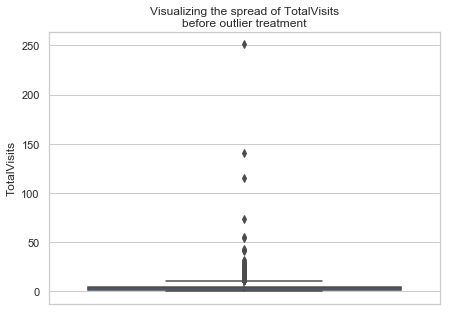

In [865]:
# Visualizing the spread before outlier treatment
sns.set(style = 'whitegrid')
plt.figure(figsize=(7,5))
sns.boxplot(y = 'TotalVisits', data = leads)
plt.title('Visualizing the spread of TotalVisits\nbefore outlier treatment')
plt.show()

In [866]:
# Performing outlier treatment on 'TotalVisits'
Q1_tv = leads['TotalVisits'].quantile(0.25)
Q3_tv = leads['TotalVisits'].quantile(0.75)

IQR_tv = Q3_tv - Q1_tv
leads_1 = leads[(leads['TotalVisits'] >= Q1_tv - 1.5*IQR_tv) & (leads['TotalVisits'] <= Q3_tv + 1.5*IQR_tv)]

In [867]:
# Inspecting the shape
leads_1.shape

(8836, 12)

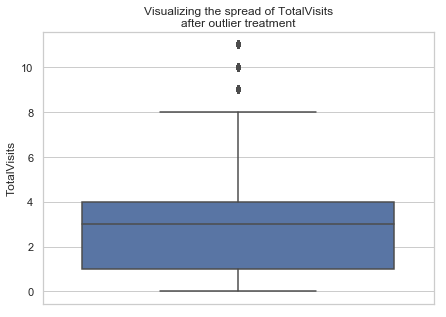

In [868]:
# Visualizing the spread after outlier treatment
plt.figure(figsize=(7,5))
sns.boxplot(y = 'TotalVisits', data = leads_1)
plt.title('Visualizing the spread of TotalVisits\nafter outlier treatment')
plt.show()

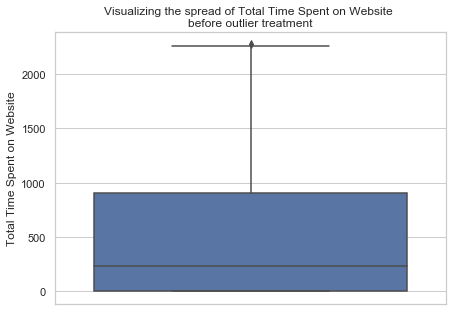

In [869]:
# Visulaizing the spread before outlier treatment
plt.figure(figsize=(7,5))
plt.title('Visualizing the spread of Total Time Spent on Website \nbefore outlier treatment')
sns.boxplot(y = 'Total Time Spent on Website', data = leads_1)
plt.show()

In [870]:
# Performing outlier treatment
Q1_tw = leads_1['Total Time Spent on Website'].quantile(0.25)
Q3_tw = leads_1['Total Time Spent on Website'].quantile(0.75)

IQR_tw = Q3_tw - Q1_tw
leads_1 = leads_1[(leads_1['Total Time Spent on Website'] >= Q1_tw - 1.5*IQR_tw) & (leads_1['Total Time Spent on Website'] <= Q3_tw + 1.5*IQR_tw)]

In [871]:
# Inspecting the shape
leads_1.shape

(8835, 12)

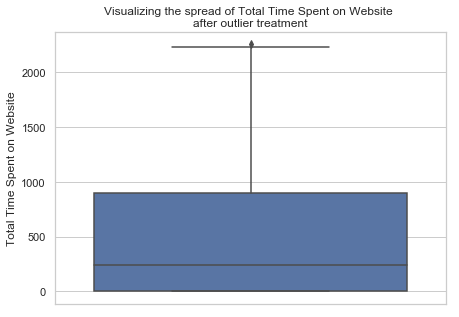

In [872]:
# Visulaizing the spread after outlier treatment
plt.figure(figsize=(7,5))
plt.title('Visualizing the spread of Total Time Spent on Website \nafter outlier treatment')
sns.boxplot(y = 'Total Time Spent on Website', data = leads_1)
plt.show()

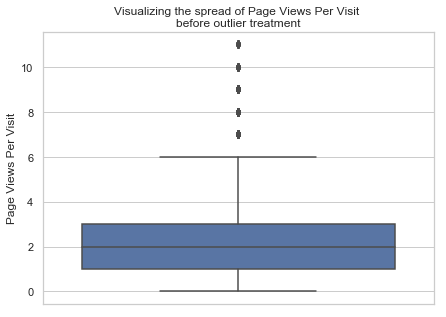

In [873]:
# Visulaizing the spread before outlier treatment
plt.figure(figsize=(7,5))
plt.title('Visualizing the spread of Page Views Per Visit \nbefore outlier treatment')
sns.boxplot(y = 'Page Views Per Visit', data = leads_1)
plt.show()

In [874]:
Q1_pv = leads_1['Page Views Per Visit'].quantile(0.25)
Q3_pv = leads_1['Page Views Per Visit'].quantile(0.75)

IQR_pv = Q3_pv - Q1_pv
leads_1 = leads_1[(leads_1['Page Views Per Visit'] >= Q1_pv - 1.5*IQR_pv) & (leads_1['Page Views Per Visit'] <= Q3_pv + 1.5*IQR_pv)]

In [875]:
# Inspecting the shape
leads_1.shape

(8541, 12)

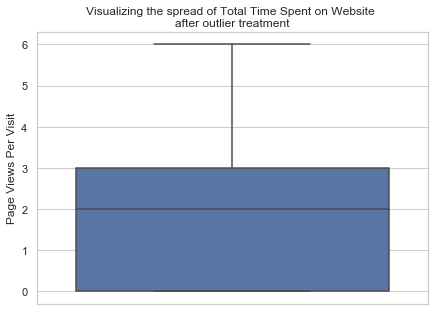

In [876]:
# Visulaizing the spread after outlier treatment
plt.figure(figsize=(7,5))
plt.title('Visualizing the spread of Total Time Spent on Website \nafter outlier treatment')
sns.boxplot(y = 'Page Views Per Visit', data = leads_1)
plt.show()

In [877]:
# Inspecting null values in the data frame
round((leads_1.isnull().sum()/len(leads_1))*100,2).sort_values(ascending = False)

What matters most to you in choosing a course    30.04
What is your current occupation                  29.83
Lead Source                                       0.34
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Last Activity                                     0.00
Page Views Per Visit                              0.00
Total Time Spent on Website                       0.00
TotalVisits                                       0.00
Converted                                         0.00
Lead Origin                                       0.00
Lead Number                                       0.00
dtype: float64

In [878]:
# Inspecting the shape
leads_1.shape

(8541, 12)

# Imputing missing values for variables and creating segments wherever possible

In [879]:
leads_1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000
mean,616989.621005,0.378410,2.810795,469.567732,2.076622
std,23289.973624,0.485019,2.435689,542.533310,1.654142
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596395.000000,0.000000,0.000000,0.000000,0.000000
50%,615429.000000,0.000000,3.000000,233.000000,2.000000
75%,637044.000000,1.000000,4.000000,888.000000,3.000000
max,660737.000000,1.000000,11.000000,2253.000000,6.000000


In [880]:
leads_1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      5973
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [881]:
#Imputing missing values in variable 'What matters most to you in choosing a course' with Other factors
leads_1['What matters most to you in choosing a course'].fillna('Other factors', inplace = True)

In [882]:
# Grouping 'other' and 'flexibility & convenience' under 'Other factors'
leads_1['What matters most to you in choosing a course'].replace(['Other', 'Flexibility & Convenience'], 'Other factors', inplace = True)

In [883]:
leads_1['What is your current occupation'].value_counts()

Unemployed              5129
Working Professional     640
Student                  198
Other                     12
Housewife                  9
Businessman                5
Name: What is your current occupation, dtype: int64

#### Segmenting what is your current occupation into 3 segments i.e. Unemployed, employed and student. Working professsional and businessman would get classified under employed. Housewife would be clssified under unemployed. Other and null values would be imputed based on their means as compared to other segments.

In [884]:
leads_1['Occupation segment'] = np.select([((leads_1['What is your current occupation'] == 'Unemployed') | 
                                           (leads_1['What is your current occupation'] == 'Housewife')),
                                           ((leads_1['What is your current occupation'] == 'Working Professional') | 
                                           (leads_1['What is your current occupation'] == 'Businessman')),
                                           ],
                                          ['Unemployed', 'Employed'],
                                         default = leads_1['What is your current occupation'])

In [885]:
# Inspecting the means across numeric value for occupation segment
pd.pivot_table(data = leads_1[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation segment']].fillna('Null'), index = 'Occupation segment', values = ['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'], aggfunc = 'mean', dropna = False)

,Converted,Page Views Per Visit,Total Time Spent on Website,TotalVisits
Occupation segment,,,,
Employed,0.913178,2.028419,645.262016,2.809302
Null,0.138148,1.852473,351.968603,2.540424
Other,0.500000,2.694167,939.750000,4.583333
Student,0.348485,1.658586,417.878788,2.303030
Unemployed,0.431296,2.208499,506.724601,2.960490


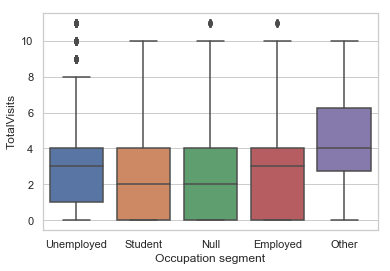

In [886]:
# Visualizing numeric variables spread accross occupation segment
sns.boxplot(data = leads_1[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation segment']].fillna('Null'),
            y = 'TotalVisits', x = 'Occupation segment')
plt.show()

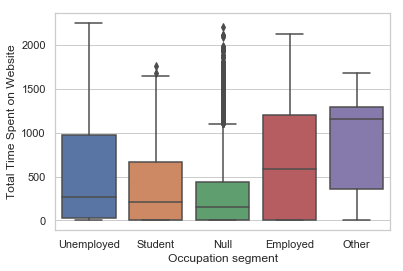

In [887]:
# Visualizing numeric variables spread accross occupation segment
sns.boxplot(data = leads_1[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation segment']].fillna('Null'),
            y = 'Total Time Spent on Website', x = 'Occupation segment')
plt.show()

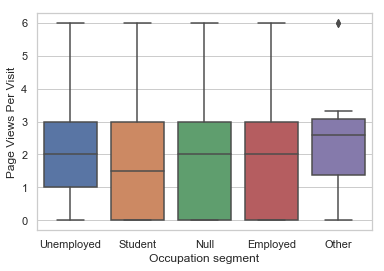

In [888]:
# Visualizing numeric variables spread accross occupation segment
sns.boxplot(data = leads_1[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation segment']].fillna('Null'),
            y = 'Page Views Per Visit', x = 'Occupation segment')
plt.show()

From the above it can be concluded that the mean for numeric values and the spread of null segment is closer to those of student and that of others is closer to that of employed. Accordingly we should segment them accordingly.

In [889]:
# Updating the occupation segments based on above conclusion
leads_1['Occupation segment'].fillna('Student', inplace = True)
leads_1['Occupation segment'].replace('Other', 'Employed', inplace = True)

In [890]:
leads_1['Occupation segment'].value_counts()

Unemployed    5138
Student       2746
Employed       657
Name: Occupation segment, dtype: int64

In [891]:
# Droping the original column for which segment is created
leads_1.drop('What is your current occupation', axis = 1, inplace=True)

In [892]:
# Inspecting Null values
leads_1.isnull().sum()

Lead Number                                       0
Lead Origin                                       0
Lead Source                                      29
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
What matters most to you in choosing a course     0
A free copy of Mastering The Interview            0
Last Notable Activity                             0
Occupation segment                                0
dtype: int64

In [893]:
# Inspecting the value counts in Lead Source
leads_1['Lead Source'].value_counts()

Google               2732
Direct Traffic       2367
Olark Chat           1746
Organic Search        937
Reference             440
Welingak Website      128
Referral Sites        106
Facebook               30
bing                    6
google                  5
Click2call              3
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
Press_Release           1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

### Creating segments for Lead sources

In [894]:
leads_1['Lead sources segment'] = np.select([(leads_1['Lead Source'].str.lower() == 'google'),
                                            (leads_1['Lead Source'].str.lower() == 'direct traffic'),
                                            (leads_1['Lead Source'].str.lower() == 'olark chat'),
                                            (leads_1['Lead Source'].str.lower() == 'organic search'),
                                            (leads_1['Lead Source'].str.lower() == 'reference'),
                                            (leads_1['Lead Source'].str.lower() == 'welingak website'),
                                            (leads_1['Lead Source'].str.lower() == 'referral sites'),
                                            (leads_1['Lead Source'].isnull())],
                                            ['Google', 'Direct traffic', 'Olark Chat', 'Organic search',
                                            'Reference', 'Welingak Website', 'Referral Sites', 'Null'],
                                            default = 'Other sources')

In [895]:
pd.pivot_table(data = leads_1[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Lead sources segment']].fillna('Null'), index = 'Lead sources segment', values = ['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'], aggfunc = 'mean', dropna = False)

,Converted,Page Views Per Visit,Total Time Spent on Website,TotalVisits
Lead sources segment,,,,
Direct traffic,0.319814,2.576798,603.445289,3.385298
Google,0.397881,2.865462,654.864085,3.847278
Null,0.896552,0.068966,0.310345,0.068966
Olark Chat,0.254868,0.136151,58.064147,0.288087
Organic search,0.363927,3.331025,616.400213,4.605123
Other sources,0.333333,0.906863,165.686275,1.117647
Reference,0.925000,0.113045,85.093182,0.179545
Referral Sites,0.226415,3.080189,543.500000,4.650943
Welingak Website,0.984375,0.085938,57.828125,0.117188


From the above it can be noted that the mean value of numeric variables for null values are closre to that of Welingak Website, hence grouping them together.

In [896]:
# Creating segments based on above conclusion
leads_1['Lead sources segment'].replace('Null', 'Welingak Website', inplace = True)

In [897]:
# Inspecting the value counts post segmentation
leads_1['Lead sources segment'].value_counts()

Google              2737
Direct traffic      2367
Olark Chat          1746
Organic search       937
Reference            440
Welingak Website     157
Referral Sites       106
Other sources         51
Name: Lead sources segment, dtype: int64

In [898]:
# Dropping the original variable column
leads_1.drop('Lead Source', axis = 1, inplace= True)

In [899]:
# Inspecting null values
leads_1.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
Occupation segment                               0
Lead sources segment                             0
dtype: int64

In [900]:
# Inspecting the Dataframe
leads_1.head(3)

,Lead Number,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity,Occupation segment,Lead sources segment
0,660737,API,0,0.0,0,0.0,Page Visited on Website,Better Career Prospects,No,Modified,Unemployed,Olark Chat
1,660728,API,0,5.0,674,2.5,Email Opened,Better Career Prospects,No,Email Opened,Unemployed,Organic search
2,660727,Landing Page Submission,1,2.0,1532,2.0,Email Opened,Better Career Prospects,Yes,Email Opened,Student,Direct traffic


In [901]:
# Inspecting the shape
leads_1.shape

(8541, 12)

## Creating segments for Last Activity

In [902]:
# Inpecting value counts for Last Activity
leads_1['Last Activity'].value_counts()

Email Opened                    3218
SMS Sent                        2579
Olark Chat Conversation          948
Page Visited on Website          525
Converted to Lead                425
Email Bounced                    302
Email Link Clicked               255
Form Submitted on Website        110
Unreachable                       84
Unsubscribed                      59
Had a Phone Conversation          21
Approached upfront                 5
View in browser link Clicked       4
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Grouping the activities with count less than 100 into 'other last activity'

In [903]:
# Creating segments based on above analysis
leads_1['Last activity segment'] = np.select([(leads_1['Last Activity'] == 'Email Opened'),
                                              (leads_1['Last Activity'] == 'SMS Sent'),
                                              (leads_1['Last Activity'] == 'Olark Chat Conversation'),
                                              (leads_1['Last Activity'] == 'Page Visited on Website'),
                                              (leads_1['Last Activity'] == 'Converted to Lead'),
                                              (leads_1['Last Activity'] == 'Email Bounced'),
                                              (leads_1['Last Activity'] == 'Email Link Clicked'),
                                              (leads_1['Last Activity'] == 'Form Submitted on Website')], 
                                             ['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
                                               'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
                                               'Email Link Clicked', 'Form Submitted on Website'],
                                              default = 'Other last activity')

In [904]:
# Inspecting value counts post segmentation
leads_1['Last activity segment'].value_counts()

Email Opened                 3218
SMS Sent                     2579
Olark Chat Conversation       948
Page Visited on Website       525
Converted to Lead             425
Email Bounced                 302
Email Link Clicked            255
Other last activity           179
Form Submitted on Website     110
Name: Last activity segment, dtype: int64

In [905]:
# Dropping the original column
leads_1.drop('Last Activity', axis = 1, inplace = True)

## Creating segments for Last Notable Activity

In [906]:
# Inspecting Value counts for Last Notable Activity
leads_1['Last Notable Activity'].value_counts()

Modified                        3122
Email Opened                    2636
SMS Sent                        2048
Page Visited on Website          247
Olark Chat Conversation          175
Email Link Clicked               161
Email Bounced                     59
Unsubscribed                      45
Unreachable                       30
Had a Phone Conversation          11
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [907]:
# Creating segments for values with less than 100 count
leads_1['Last notable activity segment'] = np.select([(leads_1['Last Notable Activity'] == 'Modified'),
                                              (leads_1['Last Notable Activity'] == 'Email Opened'),
                                              (leads_1['Last Notable Activity'] == 'SMS Sent'),
                                              (leads_1['Last Notable Activity'] == 'Page Visited on Website'),
                                              (leads_1['Last Notable Activity'] == 'Olark Chat Conversation'),
                                              (leads_1['Last Notable Activity'] == 'Email Link Clicked')], 
                                             ['Modified', 'Email Opened', 'SMS Sent',
                                               'Page Visited on Website', 'Olark Chat Conversation',
                                               'Email Link Clicked'],
                                              default = 'Other notable last activity')

In [908]:
# Dropping the original variable
leads_1.drop('Last Notable Activity', axis = 1, inplace = True)

In [909]:
# Inspecting the shape
leads_1.shape

(8541, 12)

## Mapping binary values to columns with Yes/No values

In [910]:
# Map Binary values (0,1) to columns with Yes/No values
leads_1['A free copy of Mastering The Interview'] = leads_1['A free copy of Mastering The Interview'].map({'Yes':1, 'No': 0})

## Creating Dummy variables

In [911]:
# Inspecting the features
leads_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                                      8541 non-null int64
Lead Origin                                      8541 non-null object
Converted                                        8541 non-null int64
TotalVisits                                      8541 non-null float64
Total Time Spent on Website                      8541 non-null int64
Page Views Per Visit                             8541 non-null float64
What matters most to you in choosing a course    8541 non-null object
A free copy of Mastering The Interview           8541 non-null int64
Occupation segment                               8541 non-null object
Lead sources segment                             8541 non-null object
Last activity segment                            8541 non-null object
Last notable activity segment                    8541 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1

In [912]:
# Creating dummy variables for 'Lead Origin'
dum1 = pd.get_dummies(leads_1['Lead Origin']).drop('Lead Import', axis = 1)

In [913]:
# Creating dummy variables for 'What matters most to you in choosing a course'
dum2 = pd.get_dummies(leads_1['What matters most to you in choosing a course']).drop('Other factors', axis = 1)

In [914]:
# Creating dummy variables for 'Occupation segment'
dum3 = pd.get_dummies(leads_1['Occupation segment']).drop('Employed', axis = 1)

In [915]:
# Creating dummy variables for 'Lead sources segment'
dum4 = pd.get_dummies(leads_1['Lead sources segment']).drop('Other sources', axis = 1)

In [916]:
# Creating dummy variables for 'Last Activity segment'
dum5 = pd.get_dummies(leads_1['Last activity segment'], prefix = 'LA').drop('LA_Form Submitted on Website', axis = 1)

In [917]:
# Creating dummy variables for 'Last notable Activity segment'
dum6 = pd.get_dummies(leads_1['Last notable activity segment'], prefix = 'LNA').drop('LNA_Other notable last activity', axis = 1)

In [918]:
# Inspecting Shape
leads_1.shape

(8541, 12)

In [919]:
# Combining the dummy variables with original dataframe
leads_final = pd.concat([leads_1, dum1, dum2, dum3, dum4, dum5, dum6], axis = 1)

In [920]:
# Inspecting shape
leads_final.shape

(8541, 39)

In [921]:
# Dropping the original variables for which dummy variables were created
leads_final.drop(['Lead Origin', 'Lead sources segment', 'Last activity segment',
       'Occupation segment',
       'What matters most to you in choosing a course',
       'Last notable activity segment'], axis = 1, inplace = True)

In [922]:
# Inspecting shape
leads_final.shape

(8541, 33)

In [923]:
# Inspecting head
leads_final.head(3)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Better Career Prospects,...,LA_Olark Chat Conversation,LA_Other last activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
0,660737,0,0.0,0,0.0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


## Train Test split

In [924]:
from sklearn.model_selection import train_test_split

In [925]:
# Putting feature variable to X
X = leads_final.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Better Career Prospects,Student,Unemployed,...,LA_Olark Chat Conversation,LA_Other last activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
0,0.0,0,0.0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [926]:
# Putting response variable to y
y = leads_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [927]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [928]:
# Inspecting shape
X_train.shape

(5978, 31)

In [929]:
# Inspecting shape
X_test.shape

(2563, 31)

## Feature Scaling

In [930]:
from sklearn.preprocessing import MinMaxScaler

In [931]:
scaler = MinMaxScaler()

In [932]:
X_train[:] = scaler.fit_transform(X_train)

In [933]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Better Career Prospects,Student,Unemployed,...,LA_Olark Chat Conversation,LA_Other last activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
2135,0.272727,0.315207,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8818,0.272727,0.608295,0.166667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3328,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3259,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1551,0.545455,0.150230,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [934]:
# Inspecting descriptive summary post normalising the data
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Better Career Prospects,Student,Unemployed,...,LA_Olark Chat Conversation,LA_Other last activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
count,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.00000,5978.000000,5978.000000,...,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000,5978.000000
mean,0.255056,0.216562,0.347659,0.299766,0.413014,0.514386,0.068919,0.69990,0.321345,0.600368,...,0.110907,0.020074,0.061559,0.299599,0.019070,0.310304,0.369689,0.019237,0.028939,0.236367
std,0.220428,0.250363,0.277518,0.458194,0.492417,0.499835,0.253338,0.45834,0.467032,0.489864,...,0.314043,0.140264,0.240373,0.458120,0.136782,0.462657,0.482761,0.137369,0.167650,0.424885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.181818,0.106452,0.333333,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.363636,0.414171,0.500000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# RFE

In [935]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs')  #solver='lbfgs',max_iter=100

In [936]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [937]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('API', True, 1),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Better Career Prospects', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Direct traffic', False, 10),
 ('Google', False, 13),
 ('Olark Chat', True, 1),
 ('Organic search', False, 11),
 ('Reference', False, 3),
 ('Referral Sites', False, 12),
 ('Welingak Website', True, 1),
 ('LA_Converted to Lead', True, 1),
 ('LA_Email Bounced', True, 1),
 ('LA_Email Link Clicked', False, 16),
 ('LA_Email Opened', False, 8),
 ('LA_Olark Chat Conversation', True, 1),
 ('LA_Other last activity', False, 9),
 ('LA_Page Visited on Website', False, 14),
 ('LA_SMS Sent', True, 1),
 ('LNA_Email Link Clicked', False, 5),
 ('LNA_Email Opened', False, 7),
 ('LNA_Modified', False, 2),
 ('LNA_Olark Chat Conversation', False, 6),
 ('LNA_Page Visited on 

In [938]:
# Creating a list of columns selected by RFE
col = X_train.columns[rfe.support_]

In [939]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'API', 'Landing Page Submission', 'Lead Add Form',
       'Better Career Prospects', 'Student', 'Unemployed', 'Olark Chat',
       'Welingak Website', 'LA_Converted to Lead', 'LA_Email Bounced',
       'LA_Olark Chat Conversation', 'LA_SMS Sent'],
      dtype='object')

#### Assessing the model with StatsModels

In [940]:
import statsmodels.api as sm

In [941]:
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5978
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2379.9
Date:                Sun, 03 Mar 2019   Deviance:                       4759.7
Time:                        21:24:28   Pearson chi2:                 6.04e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4944      0.596     -0.829      0.407      -1.663       0.674
TotalVisits                     1.4040      0.250      5.619      0.000       0.914       1.894
Total Time Spent on Website     4.5564      0.171     26.647      0.000       4.221       4.892
Page Views Per Visit           -0.8669      0.225     -3.845      0.000      -1.309      -0.425
API                            -0.6230      0.540     -1.154      0.248      -1.681       0.435
Landing Page Submission        -0.9902      0.540     -1.835      0.067      -2.048       0.068
Lead Add Form                   2.8435      0.562      5.059      0.000       1.742       3.945
Better Career Prospects         1.5744      0.232      6.778      0.000       1.119       2.030
Student                        -2.2007      0.278     -7.907      0.000      -2.746      -1.655
Unemployed                     -2.4701      0.183    -13.520      0.000      -2.828      -2.112
Olark Chat                      1.3210      0.151      8.775      0.000       1.026       1.616
Welingak Website                1.8242      0.647      2.819      0.005       0.556       3.092
LA_Converted to Lead           -1.3694      0.241     -5.689      0.000      -1.841      -0.898
LA_Email Bounced               -1.9622      0.359     -5.460      0.000      -2.667      -1.258
LA_Olark Chat Conversation     -1.6344      0.177     -9.210      0.000      -1.982      -1.287
LA_SMS Sent                     1.2548      0.079     15.842      0.000       1.100       1.410
===============================================================================================
"""

In [942]:
# Dropping variable 'API' since it's insignificant i.e. P>|z| >0.05
col = col.drop('API') 

In [943]:
# Re-running the model
X_train_sm = sm.add_constant(X_train[col])
log2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5978
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2380.5
Date:                Sun, 03 Mar 2019   Deviance:                       4760.9
Time:                        21:24:28   Pearson chi2:                 6.04e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0817      0.316     -3.422      0.001      -1.701      -0.462
TotalVisits                     1.3859      0.249      5.563      0.000       0.898       1.874
Total Time Spent on Website     4.5416      0.170     26.662      0.000       4.208       4.875
Page Views Per Visit           -0.8900      0.225     -3.964      0.000      -1.330      -0.450
Landing Page Submission        -0.3759      0.095     -3.958      0.000      -0.562      -0.190
Lead Add Form                   3.4281      0.251     13.682      0.000       2.937       3.919
Better Career Prospects         1.5740      0.232      6.782      0.000       1.119       2.029
Student                        -2.2044      0.278     -7.925      0.000      -2.750      -1.659
Unemployed                     -2.4713      0.183    -13.525      0.000      -2.829      -2.113
Olark Chat                      1.2903      0.148      8.723      0.000       1.000       1.580
Welingak Website                1.8848      0.656      2.873      0.004       0.599       3.171
LA_Converted to Lead           -1.3812      0.240     -5.747      0.000      -1.852      -0.910
LA_Email Bounced               -1.9701      0.359     -5.480      0.000      -2.675      -1.266
LA_Olark Chat Conversation     -1.6383      0.177     -9.238      0.000      -1.986      -1.291
LA_SMS Sent                     1.2525      0.079     15.822      0.000       1.097       1.408
===============================================================================================
"""

In [944]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2135    0.351048
8818    0.126515
3328    0.637341
3259    0.119644
1551    0.141047
7163    0.025751
3986    0.145749
1354    0.965573
3607    0.178787
4952    0.253983
dtype: float64

## Converting the prediction probabilities in a score of 0 to 100

In [945]:
y_train_pred = round(y_train_pred * 100,0)

In [946]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([35., 13., 64., 12., 14.,  3., 15., 97., 18., 25.])

In [947]:
# Creating a DataFrame
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead Score,LeadID
0,1,35.0,2135
1,1,13.0,8818
2,1,64.0,3328
3,0,12.0,3259
4,0,14.0,1551


In [948]:
# Selecting an arbitrary score of 50 as cut-off
y_train_pred_final['predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,LeadID,predicted
0,1,35.0,2135,0
1,1,13.0,8818,0
2,1,64.0,3328,1
3,0,12.0,3259,0
4,0,14.0,1551,0


In [949]:
from sklearn import metrics

In [950]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8225158916025427


In [951]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [952]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Better Career Prospects,12.72
2,Page Views Per Visit,8.03
7,Unemployed,7.69
0,TotalVisits,6.02
6,Student,3.91
3,Landing Page Submission,3.61
8,Olark Chat,3.11
1,Total Time Spent on Website,2.33
4,Lead Add Form,2.09
13,LA_SMS Sent,1.63


In [953]:
# Dropping variable 'Better Career prospects' as VIF is > 5 
col = col.drop('Better Career Prospects')

In [954]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5978
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2401.9
Date:                Sun, 03 Mar 2019   Deviance:                       4803.8
Time:                        21:24:28   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4560      0.216      2.114      0.034       0.033       0.879
TotalVisits                     1.3725      0.248      5.542      0.000       0.887       1.858
Total Time Spent on Website     4.5257      0.169     26.734      0.000       4.194       4.858
Page Views Per Visit           -0.8817      0.223     -3.949      0.000      -1.319      -0.444
Landing Page Submission        -0.3544      0.094     -3.755      0.000      -0.539      -0.169
Lead Add Form                   3.5709      0.252     14.150      0.000       3.076       4.065
Student                        -3.5829      0.192    -18.620      0.000      -3.960      -3.206
Unemployed                     -2.4379      0.181    -13.468      0.000      -2.793      -2.083
Olark Chat                      1.2893      0.147      8.763      0.000       1.001       1.578
Welingak Website                1.7868      0.661      2.705      0.007       0.492       3.081
LA_Converted to Lead           -1.3960      0.240     -5.828      0.000      -1.865      -0.927
LA_Email Bounced               -1.9657      0.359     -5.477      0.000      -2.669      -1.262
LA_Olark Chat Conversation     -1.6185      0.176     -9.182      0.000      -1.964      -1.273
LA_SMS Sent                     1.2257      0.079     15.605      0.000       1.072       1.380
===============================================================================================
"""

In [955]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2135    0.349346
8818    0.146162
3328    0.630188
3259    0.137339
1551    0.143136
7163    0.026703
3986    0.145341
1354    0.966937
3607    0.177712
4952    0.278588
dtype: float64

## Converting the prediction probabilities in a score of 0 to 100

In [956]:
y_train_pred = round(y_train_pred * 100,0)

In [957]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([35., 15., 63., 14., 14.,  3., 15., 97., 18., 28.])

In [958]:
# Creating a Dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead Score,LeadID
0,1,35.0,2135
1,1,15.0,8818
2,1,63.0,3328
3,0,14.0,3259
4,0,14.0,1551


In [959]:
# Using previously selected cut off of 50
y_train_pred_final['predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,LeadID,predicted
0,1,35.0,2135,0
1,1,15.0,8818,0
2,1,63.0,3328,1
3,0,14.0,3259,0
4,0,14.0,1551,0


In [960]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8211776513884242


Thus it can be noted that by dropping the variable 'Better carer propects', the overall accuracy of the model has not reduced.

In [961]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.70
0,TotalVisits,5.87
6,Unemployed,4.68
3,Landing Page Submission,3.41
5,Student,3.08
7,Olark Chat,2.50
1,Total Time Spent on Website,2.20
12,LA_SMS Sent,1.60
4,Lead Add Form,1.59
11,LA_Olark Chat Conversation,1.49


In [962]:
# Dropping the variable 'Page Views Per Visit' as the VIF is >5
col = col.drop('Page Views Per Visit')

In [963]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5978
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2409.8
Date:                Sun, 03 Mar 2019   Deviance:                       4819.6
Time:                        21:24:29   Pearson chi2:                 6.10e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2446      0.209      1.173      0.241      -0.164       0.653
TotalVisits                     0.8946      0.216      4.147      0.000       0.472       1.317
Total Time Spent on Website     4.5050      0.169     26.679      0.000       4.174       4.836
Landing Page Submission        -0.4191      0.093     -4.518      0.000      -0.601      -0.237
Lead Add Form                   3.7718      0.247     15.247      0.000       3.287       4.257
Student                        -3.5651      0.192    -18.584      0.000      -3.941      -3.189
Unemployed                     -2.4291      0.181    -13.453      0.000      -2.783      -2.075
Olark Chat                      1.4839      0.139     10.645      0.000       1.211       1.757
Welingak Website                1.8138      0.666      2.722      0.006       0.508       3.120
LA_Converted to Lead           -1.3342      0.240     -5.565      0.000      -1.804      -0.864
LA_Email Bounced               -1.9047      0.357     -5.343      0.000      -2.603      -1.206
LA_Olark Chat Conversation     -1.6054      0.176     -9.109      0.000      -1.951      -1.260
LA_SMS Sent                     1.2087      0.078     15.456      0.000       1.055       1.362
===============================================================================================
"""

In [964]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2135    0.372730
8818    0.125479
3328    0.624347
3259    0.137450
1551    0.191728
7163    0.028155
3986    0.188748
1354    0.967739
3607    0.183255
4952    0.290270
dtype: float64

## Converting the prediction probabilities in a score of 0 to 100

In [965]:
y_train_pred = round(y_train_pred * 100,0)

In [966]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([37., 13., 62., 14., 19.,  3., 19., 97., 18., 29.])

In [967]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead Score,LeadID
0,1,37.0,2135
1,1,13.0,8818
2,1,62.0,3328
3,0,14.0,3259
4,0,19.0,1551


In [968]:
# Using the previously selected cut off of 50
y_train_pred_final['predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,LeadID,predicted
0,1,37.0,2135,0
1,1,13.0,8818,0
2,1,62.0,3328,1
3,0,14.0,3259,0
4,0,19.0,1551,0


In [969]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8178320508531282


Thus it can be noted that by dropping the variable 'Page Views Per Visit', the overall accuracy of the model has not reduced.

In [970]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Unemployed,4.28
0,TotalVisits,3.79
2,Landing Page Submission,3.16
4,Student,2.88
6,Olark Chat,2.37
1,Total Time Spent on Website,2.19
11,LA_SMS Sent,1.59
3,Lead Add Form,1.56
10,LA_Olark Chat Conversation,1.49
7,Welingak Website,1.34


No need to drop any other variable as all the VIFs are less than 5

In [971]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3323  406]
 [ 683 1566]]


In [972]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8178320508531282


In [973]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [974]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6963094708759449

In [975]:
# Let us calculate specificity
TN / float(TN+FP)

0.8911236256369

In [976]:
# Calculate false postive rate - predicting converted when lead has not been converted
print(FP/ float(TN+FP))

0.10887637436310002


In [977]:
# Precision - positive predictive value 
print (TP / float(TP+FP))

0.7941176470588235


In [978]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8295057413879181


In [979]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [980]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Lead Score'], drop_intermediate = False )

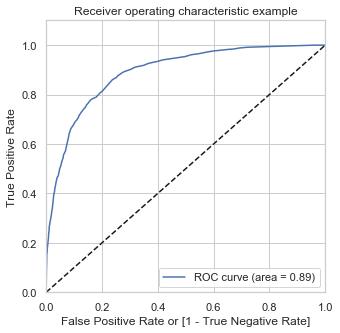

In [981]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final['Lead Score'])

In [982]:
# Let's create columns with different probability cutoffs 
numbers = [x for x in range(0,100,10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Lead Score'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead Score,LeadID,predicted,0,10,20,30,40,50,60,70,80,90
0,1,37.0,2135,0,1,1,1,1,0,0,0,0,0,0
1,1,13.0,8818,0,1,1,0,0,0,0,0,0,0,0
2,1,62.0,3328,1,1,1,1,1,1,1,1,0,0,0
3,0,14.0,3259,0,1,1,0,0,0,0,0,0,0,0
4,0,19.0,1551,0,1,1,0,0,0,0,0,0,0,0


In [983]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Lead Score','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0,10,20,30,40,50,60,70,80,90]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    Lead Score  accuracy  sensitivity  specificity
0          0.0  0.377718     1.000000     0.002414
10        10.0  0.631649     0.971543     0.426656
20        20.0  0.764637     0.912406     0.675516
30        30.0  0.794078     0.868386     0.749263
40        40.0  0.817999     0.764784     0.850094
50        50.0  0.817832     0.696309     0.891124
60        60.0  0.811810     0.634504     0.918745
70        70.0  0.782703     0.506892     0.949048
80        80.0  0.761961     0.417964     0.969429
90        90.0  0.716628     0.265007     0.989005


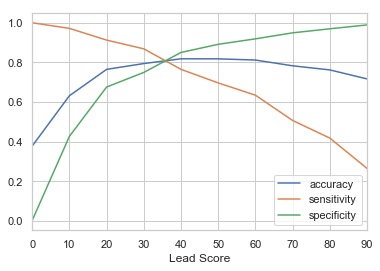

In [984]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Lead Score', y=['accuracy','sensitivity','specificity'])
plt.show()

Precision recall tradeoff

In [985]:
from sklearn.metrics import precision_recall_curve

In [986]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      1
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 5948    1
 5949    0
 5950    1
 5951    0
 5952    0
 5953    0
 5954    0
 5955    1
 5956    0
 5957    1
 5958    1
 5959    1
 5960    0
 5961    0
 5962    0
 5963    1
 5964    0
 5965    0
 5966    1
 5967    0
 5968    1
 5969    0
 5970    0
 5971    1
 5972    0
 5973    0
 5974    1
 5975    0
 5976    1
 5977    1
 Name: Converted, Length: 5978, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      1
 24      1
 25      

In [987]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Lead Score'])

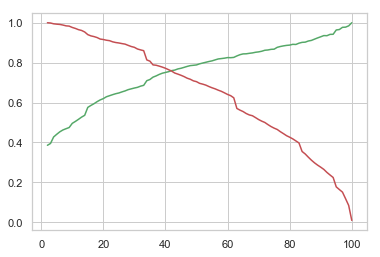

In [988]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Since the CFO has given a ballpark figure of lead conversion rate to be of 80 % i.e. we have to maintain precision of atleast 0.80

In [989]:
# Increasing the cut-off score to 60 to achieve the precision on 0.80
y_train_pred_final['final_predicted'] = y_train_pred_final['Lead Score'].map( lambda x: 1 if x > 60 else 0)

y_train_pred_final.head()

,Converted,Lead Score,LeadID,predicted,0,10,20,30,40,50,60,70,80,90,final_predicted
0,1,37.0,2135,0,1,1,1,1,0,0,0,0,0,0,0
1,1,13.0,8818,0,1,1,0,0,0,0,0,0,0,0,0
2,1,62.0,3328,1,1,1,1,1,1,1,1,0,0,0,1
3,0,14.0,3259,0,1,1,0,0,0,0,0,0,0,0,0
4,0,19.0,1551,0,1,1,0,0,0,0,0,0,0,0,0


In [990]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3426  303]
 [ 822 1427]]


In [991]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8118099698895952


In [992]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [993]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6345042240995998

In [994]:
# Let us calculate specificity
TN / float(TN+FP)

0.918744971842317

In [995]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.08125502815768303


In [996]:
# Precison - positive predictive value 
print (TP / float(TP+FP))

0.8248554913294798


Thus the precision of 0.80 is achived at a cut off of lead score of 60

In [997]:
# Negative predictive value
print (TN / float(TN+ FN))

0.806497175141243


## Comparing with Test Data

In [998]:
X_test[:] = scaler.transform(X_test)

In [999]:
X_test_sm = sm.add_constant(X_test[col])

In [1000]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3832    0.055261
915     0.044878
3345    0.137450
8340    0.249648
8072    0.942456
8505    0.994383
1269    0.624347
3385    0.048479
7919    0.633674
5686    0.906866
dtype: float64

Converting the probabilities into lead score in 0 to 100 range

In [1001]:
y_test_pred = round(y_test_pred * 100,0)

In [1002]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([ 6.,  4., 14., 25., 94., 99., 62.,  5., 63., 91.])

In [1003]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Lead Score':y_test_pred})
y_test_pred_final['LeadID'] = y_test.index
y_test_pred_final.head()

,Converted,Lead Score,LeadID
0,0,6.0,3832
1,0,4.0,915
2,0,14.0,3345
3,0,25.0,8340
4,1,94.0,8072


In [1004]:
# Using the cut off of 60 as decided to predict the Conversion
y_test_pred_final['predicted'] = y_test_pred_final['Lead Score'].map(lambda x: 1 if x > 60 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Lead Score,LeadID,predicted
0,0,6.0,3832,0
1,0,4.0,915,0
2,0,14.0,3345,0
3,0,25.0,8340,0
4,1,94.0,8072,1


In [1005]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[1446  134]
 [ 390  593]]


In [1006]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.795552087397581


In [1007]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1008]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6032553407934893

In [1009]:
# Let us calculate specificity
TN / float(TN+FP)

0.9151898734177215

In [1010]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.08481012658227848


In [1011]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7875816993464052


In [1012]:
# Precision - positive predictive value 
print (TP / float(TP+FP))

0.8156808803301238


## We have achieved the precision of 0.80 in our test data as well.